# HW 5
___

In [18]:
import random
import numpy as np
import operator
import matplotlib.pyplot as plt
import math

import matplotlib.animation as anim
from IPython.display import HTML
plt.rcParams["animation.html"] = "jshtml"

# Optional: add this code after `anim_fig = anim.FuncAnimation(...)`
#           to eliminate the extra final frame
# display(HTML(anim_fig.to_jshtml()))
# plt.close() 

### Postfix Notation

In *postfix notation* (also called *reverse Polish notation*), mathematical expressions are written with the operators following the operands (numbers). Postfix notation has these advantages over the standard infix notation:
* It eliminates the need for parentheses and operator precedence rules.
* It can be evaluated easily using a stack.

Below are examples of expressions written in infix and postfix notation. When converting from infix to postfix, the numbers remain in the same order but the operators are moved so that they immediately follow their operands.

|Infix|Postfix|  
|:--|:--|  
|`4 - 7`|`4 7 -`|  
|`4 - (7 + 5)` | `4 7 5 + -` |  
|`(7 - 5) * (4 + 10)`|`7 5 - 4 10 + *`|  
|`(45 - 7 * 5 + 3)`|`45 7 5 * - 3 +`|  

Here is how postfix expressions are evaluated. The operators are processed one at a time, beginning with the leftmost operator and moving right. Each operator is applied to the previous two values. The result may be used by the next operator.

|Postfix|Evaluation| |Value|  
|:--|:--|:--|:--|  
|`4 7 -`| | |`-3`|  
|`4 7 5 + -`|`4 12 -` | |`-8`|   
|`7 5 - 4 10 + *`|`2 14 *` | |`28`|  
|`45 7 5 * - 3 +`|`45 35 - 3 +` | `10 3 +` | `13`|






**Convert these infix expressions to postfix** by hand, observing the standard operator precedence rules. Write your answers in the form of a string with spaces separating the numbers and operators.

In [2]:
infix1 = '10 - 6 + 3 * 8'
infix2 = '10 - (6 + 3 - 8)'
infix3 = '10 - (6 + 3) * 8'

In [3]:
postfix1 = '10 6 - 3 8 * +'
postfix2 = '10 6 3 + 8 - -'
postfix3 = '10 6 3 + 8 * -'

**Determine the numerical values of these postfix expressions** by hand.

In [4]:
postfix4 = '10 6 3 8 + - +'
postfix5 = '10 6 3 / + 8 *'
postfix6 = '10 6 * 3 + 8 -'

In [5]:
postfix4_value = 5
postfix5_value = 96
postfix6_value = 55

### Postfix Evaluator
Write a function **`eval_postfix(expr)`** that takes a postfix expression in string format, evaluates it, and returns its numerical value. The possible operators are `+`, `-`, `*`, and `/`. Assume that all numbers are non-negative integers. You may assume that `expr` is a valid postfix expression with spaces separating the numbers and operators.

The function should use the `Stack` class defined below to process `expr` as follows:
* Each number in the string should be pushed onto a stack.
* Each operator in the string should be applied to the top two numbers on the stack. The result of the operation should be pushed onto the stack.

*Hint:* You may wish to make use of these functions from the `operator` module: `operator.add`, `operator.sub`, `operator.mul`, and `operator.truediv`. When applied to two arguments, they return the same values as `+`, `-`, `*`, and `/`, respectively.

Example:<br>
`eval_postfix('4 7 5 + -')` returns `-8`<br>
`operator.add(7, 5)` returns `12`

In [6]:
class Stack:
    def __init__(self):
        self.items = []
        
    def push(self, item):
        self.items.append(item)
        
    def pop(self):
        try:
            return self.items.pop()
        except:
            print('ERROR: stack is empty, cannot pop')
            return None
        
    def size(self):
        return len(self.items)
        
    def peek(self):
        try:
            return self.items[-1]
        except:
            print('ERROR: stack is empty, cannot peek')
            return None
    
    def empty(self):
        return not self.items

In [7]:
def eval_postfix(expr):
    expr = expr + ' '
    count = 0
    S = Stack()
    for i in range(len(expr) - 1):
        if expr[i + 1] == ' ':
            if expr[i] != '+' and expr[i] != '-' and expr[i] != '*' and expr[i] != '/':
                S.push(int(expr[count:i + 1]))
                count = i + 2
            elif expr[i] == '+':
                S.push(S.pop() + S.pop())
                count = i + 2
            elif expr[i] == '-':
                S.push(-1*S.pop() + S.pop())
                count = i + 2
            elif expr[i] == '*':
                S.push(S.pop() * S.pop())
                count = i + 2
            elif expr[i] == '/':
                S.push((1/S.pop()) * S.pop())
                count = i + 2
    return S.pop()

In [8]:
eval_postfix(('4 7 5 + -'))

-8

___

### Animating Text

Write a function **`anim_text(word, ct=50)`** that returns an animation, repeatedly displaying a given `word`, each time at a random (x, y) location, rotated at a random angle,  for a total of `ct` times. Use multiple colors. 

A sample result for `anim_text('python')` is shown here: http://www.coloradomath.org/python/random_text.gif.

<img src="http://www.coloradomath.org/python/random_text.jpg" width="314" height="310" />

In [30]:
def anim_text(word, ct=50):
    fig, ax = plt.subplots()

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    
    colors = ['navy','r','g','c','m','y','orange','brown']

    def animate(val):
        if val !=0:
            ax.text(10*random.random(), 10*random.random(), word, rotation=360*random.random(), color=colors[val%8])

    anim_fig = anim.FuncAnimation(fig, animate, 
                       frames=ct+1, 
                       interval=10*(ct+1))

    # this code will eliminate the extra final frame
    #display(HTML(anim_fig.to_jshtml()))
    #plt.close() 

### A Parametric Curve
First **plot the parametric curve**
$$x=\sin(t) + \tfrac 12 \cos(5t) + \tfrac 14\sin(13t),$$
$$y=\cos(t) + \tfrac 12\sin(5t) + \tfrac 14\cos(13t)$$
for $0\le t \le 2\pi$. (*Hint:* Use at least 200 points.)

Then **use animation to gradually display the curve** from $t=0$ to $2\pi$.

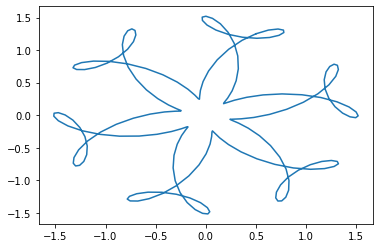

In [11]:
t = np.linspace(0,2*math.pi,200)
x = np.zeros((len(t),1))
y = np.zeros((len(t),1))
for i in range(len(t)):
    x[i] = math.sin(t[i]) + 0.5*math.cos(5*t[i]) + 0.25*math.sin(13*t[i])
    y[i] = math.cos(t[i]) + 0.5*math.sin(5*t[i]) + 0.25*math.cos(13*t[i])
plt.plot(x,y)
plt.show()

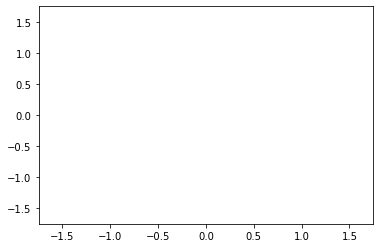

In [32]:
fig, ax = plt.subplots()
xvals, yvals = [], []
line, = ax.plot([], [], 'b')
ax.set_xlim(-1.75, 1.75)
ax.set_ylim(-1.75, 1.75)

def animate(fval):
    xvals.append(math.sin(fval) + 0.5*math.cos(5*fval) + 0.25*math.sin(13*fval))
    yvals.append(math.cos(fval) + 0.5*math.sin(5*fval) + 0.25*math.cos(13*fval))
    line.set_data(xvals, yvals)
    return line,

anim_fig = anim.FuncAnimation(fig, animate, 
                   frames=np.linspace(0, 2*math.pi, 200),
                   interval=150)

#display(HTML(anim_fig.to_jshtml()))
#plt.close()

### Rotating Circles
Write a function **`rotating_circles(n)`** that returns an animation showing `n` circles moving along a circular path. A sample result with `n=15` circles is shown here: http://www.coloradomath.org/python/rotating_circles.gif

<img src="http://www.coloradomath.org/python/rotating_circles.jpg" width="600" height="400" />

In [29]:
def rotating_circles(n):
    def animate(fval):
        for j in line,:
            line.set_data(math.cos(fval), math.sin(fval))
            return line,
    
    tvals = np.linspace(0,2*math.pi,n + 1)
    xvals = np.zeros((n + 1,1))
    yvals = np.zeros((n + 1,1))
    for i in range(len(tvals)):
        xvals[i] = math.cos(tvals[i])
        yvals[i] = math.sin(tvals[i])
    fig = plt.figure()
    ax = plt.axes(xlim=(-1.25, 1.25), ylim=(-1.25, 1.25))
    for i in range(n + 1):
        line, = ax.plot(xvals[i], yvals[i], marker='o', ms=25)
        anim_fig = anim.FuncAnimation(fig, animate, frames=np.linspace(0,2*math.pi,100), interval=200)

    ax.set_aspect('equal')

    #display(HTML(anim_fig.to_jshtml()))
    #plt.close()